In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [48]:
df1= pd.read_csv("SDB4_I_CT_CONT_PVT.csv", encoding ='UTF8') # 보험계약정보(해지계약건도 포함)
df2= pd.read_csv("SDB4_I_CT_MGG_PVT.csv", encoding ='UTF8') # 보험담보정보

In [49]:
df1.shape[0], df2.shape[0] # row개수

(368839, 1408171)

In [50]:
df1.columns

Index(['SCTR_CD', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_CNCLS_DT', 'CT_TRMNT_DT', 'CT_ST_DT', 'CT_END_DT', 'CT_EFCTV_DT',
       'CT_RST_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'IS_CT_DIGNS',
       'CT_JDGMT_CD', 'CT_CHNL_CD', 'YM_201806', 'YM_201807', 'YM_201808',
       'YM_201809', 'YM_201810', 'YM_201811', 'YM_201812', 'YM_201901',
       'YM_201902', 'YM_201903', 'YM_201904', 'YM_201905', 'YM_201906',
       'YM_201907', 'YM_201908', 'YM_201909', 'YM_201910', 'YM_201911',
       'YM_201912', 'YM_202001', 'YM_202002', 'YM_202003', 'YM_202004',
       'YM_202005', 'YM_202006'],
      dtype='object')

In [51]:
# 보험계약정보 중 여행자보험 추출
df1_t = df1[df1["INS_GBN_CD"] == 14] 
df1_t

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
8,6,2229649,1,14,5,201001,999912,201001,201001,999912,...,1,1,1,1,1,1,1,1,1,1
10,6,9491169,0,14,5,201607,999912,201607,201607,999912,...,1,1,1,1,1,1,1,1,1,1
11,6,8369667,0,14,5,201510,999912,201510,201510,999912,...,1,1,1,1,1,1,1,1,1,1
26,6,6266983,0,14,5,201006,999912,201006,201006,999912,...,1,1,1,1,1,1,1,1,1,1
29,6,924552,0,14,5,201104,999912,201104,201105,999912,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368792,6,1639974,0,14,5,201206,999912,201206,201207,999912,...,1,1,1,1,1,1,1,1,1,1
368814,6,1129729,0,14,5,201002,999912,201002,201002,999912,...,1,1,1,1,1,1,1,1,1,1
368822,6,1298452,1,14,5,200808,999912,200808,200808,999912,...,1,1,1,1,1,1,1,1,1,1
368826,6,696687,0,14,5,201804,999912,201804,201804,999912,...,1,1,1,1,1,1,1,1,1,1


In [63]:
df1_t.columns, df2.columns

(Index(['SCTR_CD', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'INS_CT_STAT_CD',
        'CT_CNCLS_DT', 'CT_TRMNT_DT', 'CT_ST_DT', 'CT_END_DT', 'CT_EFCTV_DT',
        'CT_RST_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'IS_CT_DIGNS',
        'CT_JDGMT_CD', 'CT_CHNL_CD', 'YM_201806', 'YM_201807', 'YM_201808',
        'YM_201809', 'YM_201810', 'YM_201811', 'YM_201812', 'YM_201901',
        'YM_201902', 'YM_201903', 'YM_201904', 'YM_201905', 'YM_201906',
        'YM_201907', 'YM_201908', 'YM_201909', 'YM_201910', 'YM_201911',
        'YM_201912', 'YM_202001', 'YM_202002', 'YM_202003', 'YM_202004',
        'YM_202005', 'YM_202006'],
       dtype='object'),
 Index(['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'POL_SN', 'MGG_GRP_CD', 'MGG_CD',
        'MGG_CNT', 'MGG_AMT_SUM', 'MGG_AMT_MAX', 'MGG_AMT_MIN'],
       dtype='object'))

In [64]:
# 필요 column 추출

# 보험계약정보 - 계약체결월, 계약해지월도 계약단위로 별도로 상이함 -> 일단 제거
df1_t = df1_t[["SCTR_CD", "POL_SN", "IS_GRP_INS", "INS_GBN_CD", "CT_ST_DT", "CT_END_DT", "CT_PY_AMT", "CT_PY_CYCLE_CD", "CT_PY_PD",
     "CT_CHNL_CD"]]
df1_t

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD
8,6,2229649,1,14,201001,201001,190,1,1,1
10,6,9491169,0,14,201607,201607,600,1,0,2
11,6,8369667,0,14,201510,201510,120,1,0,99
26,6,6266983,0,14,201006,201006,330,1,0,1
29,6,924552,0,14,201104,201105,75,1,0,7
...,...,...,...,...,...,...,...,...,...,...
368792,6,1639974,0,14,201206,201207,120,1,0,99
368814,6,1129729,0,14,201002,201002,1,1,0,99
368822,6,1298452,1,14,200808,200808,35,1,1,99
368826,6,696687,0,14,201804,201804,110,1,0,2


In [54]:
# 보험담보정보
df2 = df2[["JOIN_SN",'JOIN_SN_TYP','SCTR_CD','POL_SN', 'MGG_GRP_CD', 'MGG_CD', 'MGG_CNT', 'MGG_AMT_SUM', 'MGG_AMT_MAX', 'MGG_AMT_MIN']]
df2

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN
0,1492718,1,8,5418925,A1,A1300,1,65000,65000,65000
1,297523,1,8,5918673,A6,A6999,1,100,100,100
2,599247,1,8,7181175,A4,A4210,1,3600,3600,3600
3,1640775,1,6,103303,A6,A6999,1,100,100,100
4,855888,1,6,4395281,A3,A3400,1,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...
1408166,857217,1,6,8908541,A3,A3400,1,10000,10000,10000
1408167,607609,1,6,9784453,A5,A5300,1,550,550,550
1408168,698114,1,6,1385536,A4,A4105,1,9000,9000,9000
1408169,750927,1,6,9975108,A5,A5200,2,3600,3200,360


In [65]:
df1_t.shape[0], df1_t.duplicated().sum(), df2.duplicated().sum()

(67068, 3516, 0)

In [66]:
df1_t = df1_t.drop_duplicates() # 보험계약정보의 40923건 중복 row 제거
df1_t.shape[0]

63552

In [67]:
# 단체보험이 아닌 경우만 추출
df1_t[df1_t["IS_GRP_INS"] != 1]

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD
10,6,9491169,0,14,201607,201607,600,1,0,2
11,6,8369667,0,14,201510,201510,120,1,0,99
26,6,6266983,0,14,201006,201006,330,1,0,1
29,6,924552,0,14,201104,201105,75,1,0,7
44,6,9676394,0,14,201502,201502,340,1,0,3
...,...,...,...,...,...,...,...,...,...,...
368784,6,5215742,0,14,201509,201509,75,1,0,2
368792,6,1639974,0,14,201206,201207,120,1,0,99
368814,6,1129729,0,14,201002,201002,1,1,0,99
368826,6,696687,0,14,201804,201804,110,1,0,2


In [68]:
# 보험계약정보와 보험담보정보 join

df1_t.shape[0], df2.shape[0]

(63552, 1408171)

In [71]:
df3 = pd.merge(df1_t, df2, on="POL_SN")
df3

,SCTR_CD_x,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,JOIN_SN,JOIN_SN_TYP,SCTR_CD_y,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN
0,6,2612850,0,14,201904,201904,350,1,0,1,1598322,1,6,A1,A1399,1,40000,40000,40000
1,6,2612850,0,14,201904,201904,350,1,0,1,1103539,1,6,A1,A1399,1,40000,40000,40000
2,6,2612850,0,14,201904,201904,350,1,0,1,157082,1,6,A1,A1399,1,40000,40000,40000
3,6,2612850,0,14,201904,201904,350,1,0,1,28676,1,6,A1,A1399,1,60000,60000,60000
4,6,2612850,0,14,201904,201904,350,1,0,1,662881,1,6,A3,A3399,1,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67171,6,5990483,0,14,201909,201909,13,1,0,5,811053,1,6,A3,A3101,1,10000,10000,10000
67172,6,5990483,0,14,201909,201909,13,1,0,5,811053,1,6,A94,A9499,1,1500,1500,1500
67173,6,5990483,0,14,201909,201909,13,1,0,5,811053,1,6,A1,A1399,1,110000,110000,110000
67174,6,2696274,0,14,202006,202008,190,1,0,1,1376764,1,6,A3,A3300,1,10000,10000,10000


---

In [73]:
# 담보코드 구성 파악

df3.MGG_GRP_CD.unique()

array(['A1', 'A3', 'A99', 'A94', 'A6', 'A4'], dtype=object)

In [74]:
grouped = df3.groupby("INS_GBN_CD")

In [80]:
for key, group in grouped:
    print("보험종류", key)
    for n in group.MGG_GRP_CD.unique():
        print(n, df3[df3["MGG_GRP_CD"] == n].MGG_CD.unique())

보험종류 14
A1 ['A1399' 'A1199' 'A1300' 'A1100']
A3 ['A3399' 'A3199' 'A3300' 'A3100' 'A3101' 'A3303']
A99 ['A9999']
A94 ['A9499' 'A9405']
A6 ['A6100' 'A6300' 'A6999' 'A6400']
A4 ['A4199' 'A4301']


---

In [84]:
# 납입주기 구성 파악

df3.groupby("CT_PY_CYCLE_CD").count() # 모두 1 => 일시납

,SCTR_CD_x,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_PD,CT_CHNL_CD,JOIN_SN,JOIN_SN_TYP,SCTR_CD_y,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN
CT_PY_CYCLE_CD,,,,,,,,,,,,,,,,,,
1,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176,67176


In [85]:
# 보장기간(CT_PD) 컬럼 생성

df3["CT_PD"] = df3["CT_END_DT"] - df3["CT_ST_DT"]

In [89]:
df3.CT_PD.describe()

count    67176.000000
mean         4.145632
std         19.449647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: CT_PD, dtype: float64

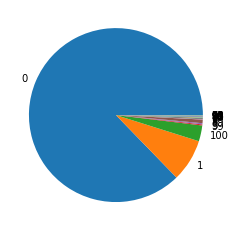

In [93]:
# 보장기간 비율 시각화

df3_group = df3.groupby("CT_PD").count()

CT_PD_arr = []
labels=[]
for i in df3.CT_PD.unique():
    CT_PD_arr.append(df3_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(CT_PD_arr, labels=labels)
plt.show()

---

In [97]:
# 보험게약관계자정보 join

df4 = pd.read_csv("SDB4_I_CT_RLPS.csv") # 보험계약관계자정보
df4

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1167730,1,6,1678831,0,2422587,I,99,1,31
1,1207761,1,6,6455722,0,8639765,I,1,1,99
2,1190281,1,6,7123339,0,1055736,I,1,1,31
3,304661,1,6,3939575,0,3371309,I,99,1,99
4,775678,1,6,4642981,0,6262129,I,1,1,99
...,...,...,...,...,...,...,...,...,...,...
377854,154888,1,6,2887858,0,7854733,I,1,1,99
377855,972308,1,6,7244812,0,7924234,I,2,1,31
377856,864415,1,6,3816916,0,8101729,I,1,1,99
377857,1099750,1,6,499250,0,8694802,C,1,1,35


In [130]:
df4_c = df4[df4["CT_RLPS_GBN_CD"] == "C"] # 계약자
df4_i = df4[df4["CT_RLPS_GBN_CD"] == "I"] # 피보험자
df4_i

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1167730,1,6,1678831,0,2422587,I,99,1,31
1,1207761,1,6,6455722,0,8639765,I,1,1,99
2,1190281,1,6,7123339,0,1055736,I,1,1,31
3,304661,1,6,3939575,0,3371309,I,99,1,99
4,775678,1,6,4642981,0,6262129,I,1,1,99
...,...,...,...,...,...,...,...,...,...,...
377853,493285,1,6,1628862,0,3589187,I,99,1,34
377854,154888,1,6,2887858,0,7854733,I,1,1,99
377855,972308,1,6,7244812,0,7924234,I,2,1,31
377856,864415,1,6,3816916,0,8101729,I,1,1,99


In [126]:
df34 = pd.merge(df3, df4_i, on="POL_SN", how="left")
df34

,SCTR_CD_x,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,...,CT_PD,JOIN_SN_y,JOIN_SN_TYP_y,SCTR_CD,COM_SN,IS_ME,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,6,2612850,0,14,201904,201904,350,1,0,1,...,0,157082.0,1.0,6.0,5039809.0,0.0,I,99.0,1.0,99.0
1,6,2612850,0,14,201904,201904,350,1,0,1,...,0,157082.0,1.0,6.0,5039809.0,0.0,I,99.0,1.0,99.0
2,6,2612850,0,14,201904,201904,350,1,0,1,...,0,157082.0,1.0,6.0,5039809.0,0.0,I,99.0,1.0,99.0
3,6,2612850,0,14,201904,201904,350,1,0,1,...,0,157082.0,1.0,6.0,5039809.0,0.0,I,99.0,1.0,99.0
4,6,2612850,0,14,201904,201904,350,1,0,1,...,0,157082.0,1.0,6.0,5039809.0,0.0,I,99.0,1.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141746,6,5990483,0,14,201909,201909,13,1,0,5,...,0,811053.0,1.0,6.0,878443.0,0.0,I,1.0,1.0,38.0
141747,6,5990483,0,14,201909,201909,13,1,0,5,...,0,811053.0,1.0,6.0,878443.0,0.0,I,1.0,1.0,38.0
141748,6,5990483,0,14,201909,201909,13,1,0,5,...,0,811053.0,1.0,6.0,878443.0,0.0,I,1.0,1.0,38.0
141749,6,2696274,0,14,202006,202008,190,1,0,1,...,2,1376764.0,1.0,6.0,248704.0,0.0,I,99.0,1.0,99.0


In [127]:
# 차주정보 join

df5 = pd.read_csv("SDB4_A_ID.csv") # (1935년 이하는 1935, 2010년 이상은 2010) # 차주의 생월·일은 제공되지 않으므로 만 나이 계산 불가
df5

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,169568,1,2010,2,1
1,1076771,1,1942,1,1
2,233370,1,1997,2,1
3,945944,1,1998,2,1
4,210996,1,1986,2,1
...,...,...,...,...,...
49129,90161,1,1962,1,1
49130,1858480,1,1992,1,1
49131,622364,1,1994,1,1
49132,924265,1,2010,1,1


In [128]:
df345 = pd.merge(df34, df5, left_on="JOIN_SN_y", right_on="JOIN_SN")
df345

,SCTR_CD_x,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,...,IS_ME,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,6,2612850,0,14,201904,201904,350,1,0,1,...,0.0,I,99.0,1.0,99.0,157082,1,2004,1,1
1,6,2612850,0,14,201904,201904,350,1,0,1,...,0.0,I,99.0,1.0,99.0,157082,1,2004,1,1
2,6,2612850,0,14,201904,201904,350,1,0,1,...,0.0,I,99.0,1.0,99.0,157082,1,2004,1,1
3,6,2612850,0,14,201904,201904,350,1,0,1,...,0.0,I,99.0,1.0,99.0,157082,1,2004,1,1
4,6,2612850,0,14,201904,201904,350,1,0,1,...,0.0,I,99.0,1.0,99.0,157082,1,2004,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141738,6,5990483,0,14,201909,201909,13,1,0,5,...,0.0,I,1.0,1.0,38.0,811053,1,1992,2,1
141739,6,5990483,0,14,201909,201909,13,1,0,5,...,0.0,I,1.0,1.0,38.0,811053,1,1992,2,1
141740,6,5990483,0,14,201909,201909,13,1,0,5,...,0.0,I,1.0,1.0,38.0,811053,1,1992,2,1
141741,6,2696274,0,14,202006,202008,190,1,0,1,...,0.0,I,99.0,1.0,99.0,1376764,1,2010,1,1


In [129]:
# 보험계약담보정보 , 보험계약관계자정보, 차주정보
df345.JOIN_SN_x, df345.JOIN_SN_y, df345.JOIN_SN

(0         1598322
 1         1103539
 2          157082
 3           28676
 4          662881
            ...   
 141738     811053
 141739     811053
 141740     811053
 141741    1376764
 141742    1376764
 Name: JOIN_SN_x, Length: 141743, dtype: int64,
 0          157082.0
 1          157082.0
 2          157082.0
 3          157082.0
 4          157082.0
             ...    
 141738     811053.0
 141739     811053.0
 141740     811053.0
 141741    1376764.0
 141742    1376764.0
 Name: JOIN_SN_y, Length: 141743, dtype: float64,
 0          157082
 1          157082
 2          157082
 3          157082
 4          157082
            ...   
 141738     811053
 141739     811053
 141740     811053
 141741    1376764
 141742    1376764
 Name: JOIN_SN, Length: 141743, dtype: int64)

In [ ]:
# 나이계산
